### Importación de datos



In [6]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [7]:
tiendas = [tienda1, tienda2, tienda3, tienda4]
contador = 1
for i in tiendas:
  ingreso_total = i['Precio'].sum()
  print(f'El ingreso total de la tienda {contador} es: $ {ingreso_total:,.2f}')
  contador += 1

El ingreso total de la tienda 1 es: $ 1,150,880,400.00
El ingreso total de la tienda 2 es: $ 1,116,343,500.00
El ingreso total de la tienda 3 es: $ 1,098,019,600.00
El ingreso total de la tienda 4 es: $ 1,038,375,700.00


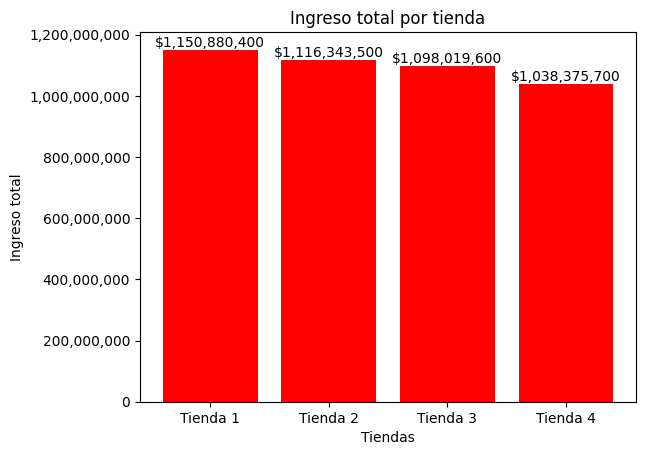

In [8]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ingreso_total = [tienda1['Precio'].sum(), tienda2['Precio'].sum(), tienda3['Precio'].sum(), tienda4['Precio'].sum()]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

barras = plt.bar(nombres_tiendas, ingreso_total, color='red')

for barra, valor in zip(barras, ingreso_total):
    plt.text(barra.get_x() + barra.get_width()/2, barra.get_height(), f"${valor:,.0f}", ha='center', va='bottom', fontsize=10)

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.xlabel('Tiendas')
plt.ylabel('Ingreso total')
plt.title('Ingreso total por tienda')
plt.show()

# 2. Ventas por categoría

In [9]:
contador = 1

for i in tiendas:
    print(f'Productos vendidos por categoría de la tienda {contador}:\n')

    categorias = i['Categoría del Producto'].value_counts()

    for categoria, cantidad in categorias.items():
        print(f'{categoria:<25} {cantidad} ventas')

    ventas_categoria_totales = categorias.sum()
    print(f'Ventas totales tienda {contador}:  {ventas_categoria_totales} ventas\n')

    contador += 1

Productos vendidos por categoría de la tienda 1:

Muebles                   465 ventas
Electrónicos              448 ventas
Juguetes                  324 ventas
Electrodomésticos         312 ventas
Deportes y diversión      284 ventas
Instrumentos musicales    182 ventas
Libros                    173 ventas
Artículos para el hogar   171 ventas
Ventas totales tienda 1:  2359 ventas

Productos vendidos por categoría de la tienda 2:

Muebles                   442 ventas
Electrónicos              422 ventas
Juguetes                  313 ventas
Electrodomésticos         305 ventas
Deportes y diversión      275 ventas
Instrumentos musicales    224 ventas
Libros                    197 ventas
Artículos para el hogar   181 ventas
Ventas totales tienda 2:  2359 ventas

Productos vendidos por categoría de la tienda 3:

Muebles                   499 ventas
Electrónicos              451 ventas
Juguetes                  315 ventas
Electrodomésticos         278 ventas
Deportes y diversión      277 ve

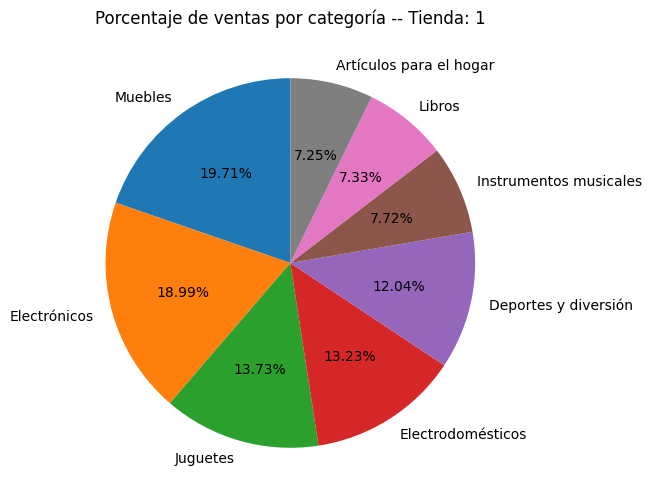

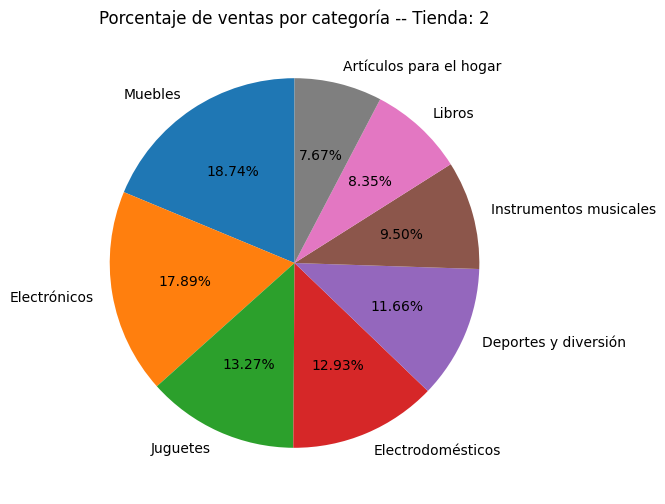

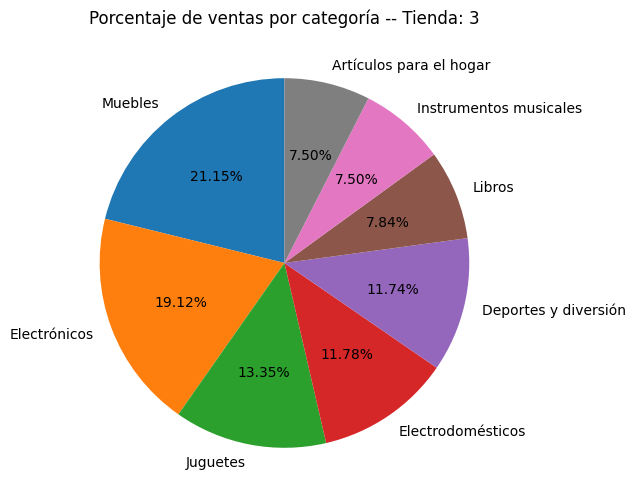

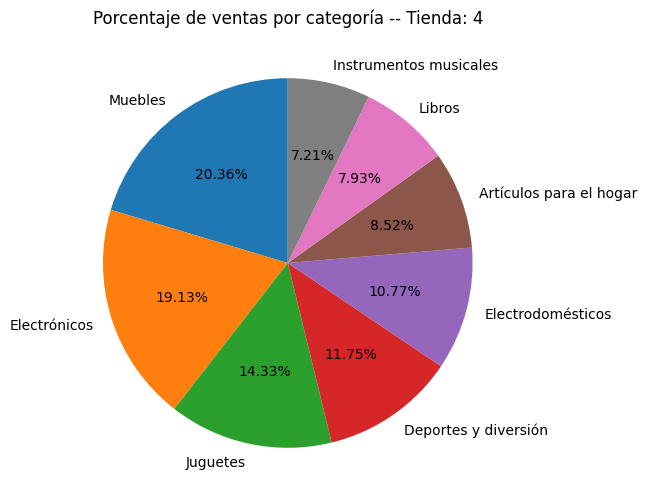

In [10]:
import matplotlib.pyplot as plt

contador = 1
for i in tiendas:
    categorias = i['Categoría del Producto'].value_counts()
    print()
    ventas_categoria_totales = categorias.sum()

    categorias.plot(kind='pie', autopct='%1.2f%%', startangle=90, figsize=(6,6))
    plt.title(f'Porcentaje de ventas por categoría -- Tienda: {contador}')
    plt.ylabel('')
    plt.show()

    contador += 1


# 3. Calificación promedio de la tienda


In [11]:
contador = 1
for i in tiendas:
  valoracion_promedio = i['Calificación'].mean()
  print(f'La calificación promedio de la tienda {contador} es: {valoracion_promedio:.3f}')
  contador += 1

La calificación promedio de la tienda 1 es: 3.977
La calificación promedio de la tienda 2 es: 4.037
La calificación promedio de la tienda 3 es: 4.048
La calificación promedio de la tienda 4 es: 3.996


# 4. Productos más y menos vendidos

In [12]:
contador = 1
for i in tiendas:
  print(f'\nProductos más y menos vendidos de la tienda {contador}:')
  productos = i['Producto'].value_counts()
  producto_mas_vendido = productos.max()
  producto_menos_vendido = productos.min()

  mas_vendidos = productos[productos == producto_mas_vendido]
  menos_vendidos = productos[productos == producto_menos_vendido]

  print(f'\nProductos más vendidos:')
  for producto, cantidad in mas_vendidos.items():
    print(f'{producto:<30} {cantidad} ventas')

  print(f'\nProductos menos vendidos:')
  for producto, cantidad in menos_vendidos.items():
    print(f'{producto:<30} {cantidad} ventas')

  contador += 1


Productos más y menos vendidos de la tienda 1:

Productos más vendidos:
Microondas                     60 ventas
TV LED UHD 4K                  60 ventas
Armario                        60 ventas

Productos menos vendidos:
Auriculares con micrófono      33 ventas
Celular ABXY                   33 ventas

Productos más y menos vendidos de la tienda 2:

Productos más vendidos:
Iniciando en programación      65 ventas

Productos menos vendidos:
Juego de mesa                  32 ventas

Productos más y menos vendidos de la tienda 3:

Productos más vendidos:
Kit de bancas                  57 ventas

Productos menos vendidos:
Bloques de construcción        35 ventas

Productos más y menos vendidos de la tienda 4:

Productos más vendidos:
Cama box                       62 ventas

Productos menos vendidos:
Guitarra eléctrica             33 ventas


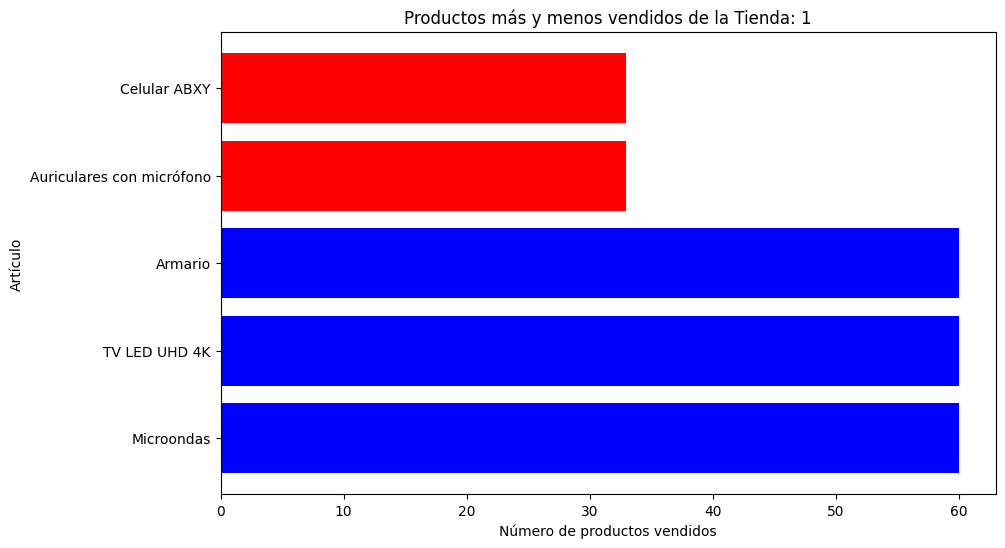

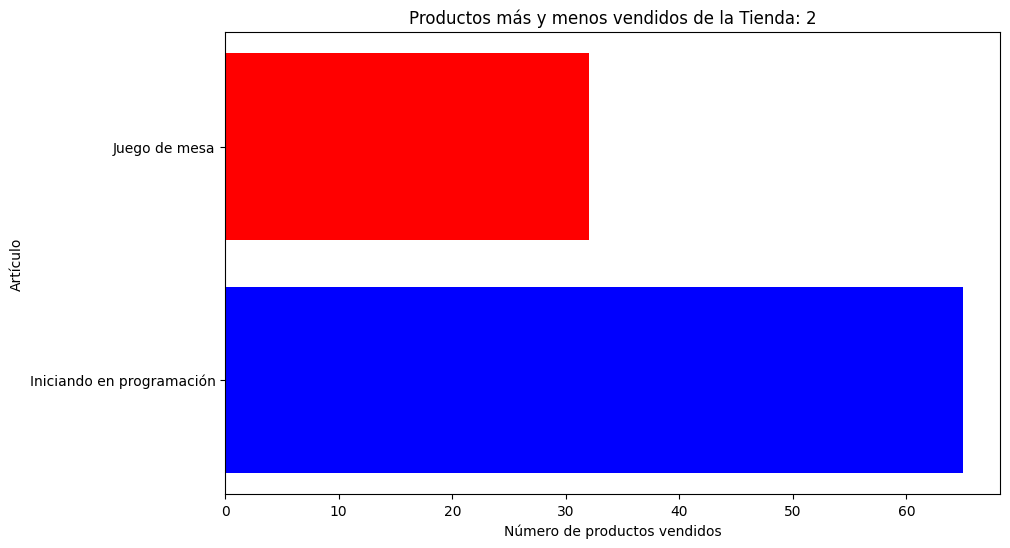

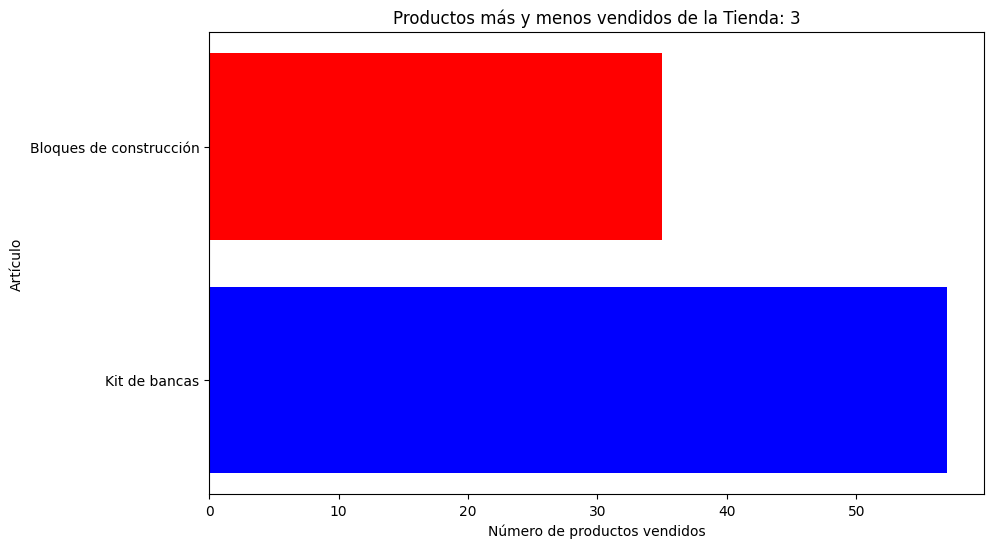

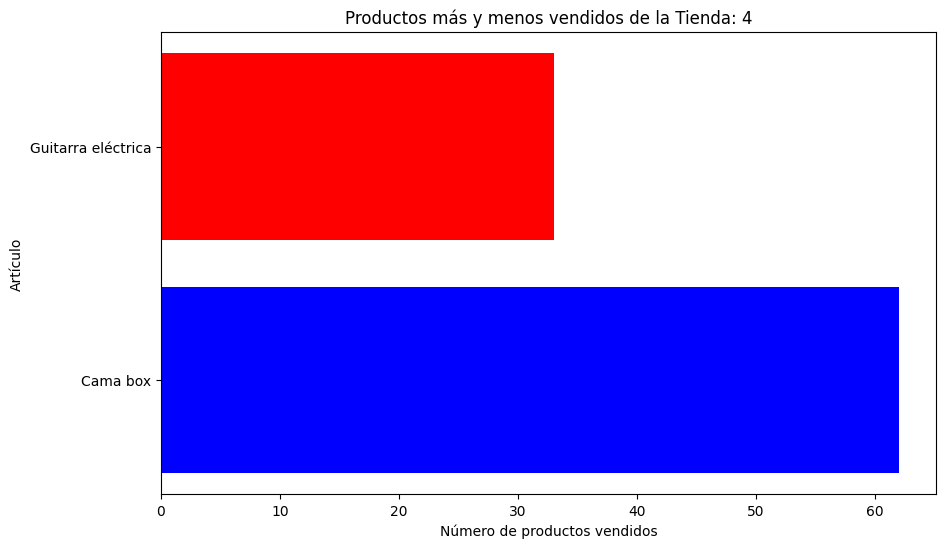

In [13]:
import matplotlib.pyplot as plt

contador = 1
for i in tiendas:
  productos = i['Producto'].value_counts()
  producto_mas_vendido = productos.max()
  producto_menos_vendido = productos.min()

  mas_vendidos = productos[productos == producto_mas_vendido]
  menos_vendidos = productos[productos == producto_menos_vendido]

  print()

  plt.figure(figsize=(10,6))

  todos_productos = pd.concat([mas_vendidos, menos_vendidos])
  colores = ['blue' if producto in mas_vendidos.index else 'red' for producto in todos_productos.index]

  plt.barh(todos_productos.index, todos_productos.values, color=colores)
  plt.xlabel('Número de productos vendidos')
  plt.ylabel('Artículo')
  plt.title(f'Productos más y menos vendidos de la Tienda: {contador}')
  plt.show()

  contador += 1

# 5. Envío promedio por tienda

In [14]:
contador = 1
for i in tiendas:
  envio_promedio = i['Costo de envío'].mean()
  print(f'El costo de envío promedio de la tienda {contador} es: $ {envio_promedio:,.2f}')
  contador += 1

El costo de envío promedio de la tienda 1 es: $ 26,018.61
El costo de envío promedio de la tienda 2 es: $ 25,216.24
El costo de envío promedio de la tienda 3 es: $ 24,805.68
El costo de envío promedio de la tienda 4 es: $ 23,459.46


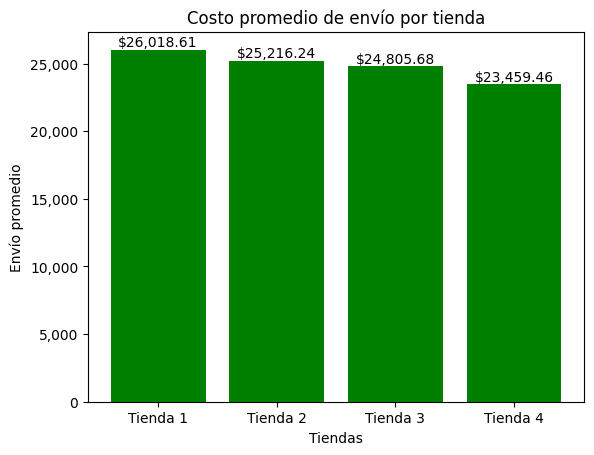

In [15]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

envio_promedio = [tienda1['Costo de envío'].mean(), tienda2['Costo de envío'].mean(), tienda3['Costo de envío'].mean(), tienda4['Costo de envío'].mean()]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

barras = plt.bar(nombres_tiendas, envio_promedio, color='green')

for barra, valor in zip(barras, envio_promedio):
    plt.text(barra.get_x() + barra.get_width()/2, barra.get_height(), f"${valor:,.2f}", ha='center', va='bottom', fontsize=10)

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.xlabel('Tiendas')
plt.ylabel('Envío promedio')
plt.title('Costo promedio de envío por tienda')
plt.show()

# 6. Informe final

El objetivo del presente análisis es ayudar al Señor Juan a decidir qué tienda debe vender para invertir en un nuevo negocio. La valuación se basa en los siguientes aspectos:

- Facturación total de cada tienda
- Categorías más populares
- Promedio de calificación de los clientes
- Productos más y menos vendidos
- Costo promedio del envío

**1.   Análisis de facturación:**

Los resultados del presente análisis nos indican que la tienda que genera menor cantidad de ingresos es la "Tienda 4". Casi 60 millones menos que la tercera en la lista y 120 millones menos que la que  tienda que más factura. La cantidad es bastante llamativa considerando los siguientes puntos en el análisis.

**2.   Ventas por categoría**

Lo que es llamativo es que el número de ventas es el mismo en las tres primeras tiendas y una venta menos en la "Tienda 4", por lo que al analizar en profundidad esta categoría vemos lo siguiente:

Las tres primeras categorías son las mismas en las cuatro tiendas y no hay grandes diferencias en el número de ventas entre ellas. El principal diferenciador es la categoría "Electrodomésticos" donde la "Tienda 4" es la que menos vende y eso influye en la facturación total. Del mismo modo la categoría "Instrumentos musicales" también es otro de los puntos débiles de la "Tienda 4" al ser la que menos ventas tiene.

Con base en las gráficas obtenidas y en la cifras de ventas podemos determinar que la "Tienda 4", a pesar de solo tener una venta menos que las demás, es la que tiene menor venta en categorías clave que aumentan la facturación total.

**3.   Calificación promedio de las tiendas:**

La calificación promedio no es un factor determinante para la decisión final pues las cuatro tiendas tienen una calificación prácticamente igual. Sin embargo la "Tienda 1" y la "Tienda 4" tienen una calificación un poco por debajo de los 4 puntos de 5 posibles, mientras que la "Tienda 2" y la "Tienda 3" un poco por encima de las 4 puntos. El impacto que puede producir es que los usuarios muchas veces se basan en las calificaciónes por encima de los 4 puntos y que se acerquen más a los 5. De esta forma, a la vista del cliente un 3.9 podría significar preferir comprar en otra tienda.

**4.   Productos más y menos vendidos:**

Los productos más vendidos en casi todas las tiendas forman parte de las 3 primeras categorías que más venden, la único excepción es la "Tienda 2" que tiene un libro como su producto más vendido. El punto determinante en este análisis es el producto menos vendido de la "Tienda 4": Guitarra eléctrica, que forma parte de una de las categorías clave en la facturación total, la "Tienda 1" también tiene un par de productos de esa categoría pero la diferencia es que tiene 3 productos en el Top 1 de vendidos de categorías más importantes como los son "Muebles" o "Electrodomésticos".

**5.   Envío promedio por tienda:**

La "Tienda 4" es la que menos cobra por envío lo que también afecta su facturación total. El orden en este análisis es el mismo que en el punto 1, lo que confirma la tendencia final.

# **Conclusión:**

Con base en los análisis realizados se llegó a la conclusion que la "Tienda 4" es la que se debería vender. Los ingresos generados están muy por debajo de las otras tres tiendas y no hay indicadores que sugieran que la tendencia cambiará. Del mismo modo, los productos de categorías que más ingresos generan no tienen ventas altas en esta tienda, lo que impacta en la facturación total. A pesar de tener ventas prácticamente iguales las categorías que más venden no logran igualar el desempeño de las otras tres tiendas.

